In [3]:
library(tidyverse)
library(dplyr)
library(lubridate)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [4]:
HD <- "hotel_bookings.csv"
hData <- read.csv(HD)

In [5]:
str(hData)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : Factor w/ 12 levels "April","August",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : Factor w/ 5 levels "BB","

In [6]:
table(is.na(hData))


  FALSE    TRUE 
3820476       4 

In [7]:
hotelData <- na.omit(hData)
table(is.na(hotelData))


  FALSE 
3820352 

In [8]:
head(hotelData)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


In [9]:
HT <- as.character(hotelData$hotel)

In [10]:
resortHotels <- filter(hotelData, hotel == "Resort Hotel")
resortHotels1 <- filter(hotelData, hotel == "Resort Hotel" ,is_repeated_guest == "1" )
resortHotels0 <- filter(hotelData, hotel == "Resort Hotel" ,is_repeated_guest == "0" )

In [30]:
resortHotels2015 <- filter(cityHotels, arrival_date_year == "2015")
resortHotels2016 <- filter(cityHotels, arrival_date_year == "2016")
resortHotels2017 <- filter(cityHotels, arrival_date_year == "2017")

In [11]:
resortHotels

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NULL,NULL,0,Transient,107.00,0,0,Check-Out,2015-07-03
Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303,NULL,0,Transient,103.00,0,1,Check-Out,2015-07-03
Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240,NULL,0,Transient,82.00,0,1,Canceled,2015-05-06
Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15,NULL,0,Transient,105.50,0,0,Canceled,2015-04-22


In [12]:
cityHotels <- filter(hotelData, hotel == "City Hotel" )
cityHotels1 <- filter(hotelData, hotel == "City Hotel" ,is_repeated_guest == "1" )
cityHotels0 <- filter(hotelData, hotel == "City Hotel" ,is_repeated_guest == "0" )

In [29]:
cityHotels2015 <- filter(cityHotels, arrival_date_year == "2015")
cityHotels2016 <- filter(cityHotels, arrival_date_year == "2016")
cityHotels2017 <- filter(cityHotels, arrival_date_year == "2017")

In [26]:
head(cityHotels2015)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
City Hotel,1,119,2016,January,1,1,0,1,2,...,No Deposit,14,NULL,0,Transient,74.25,0,0,Canceled,2015-12-31
City Hotel,0,0,2016,January,1,1,0,1,2,...,No Deposit,9,NULL,0,Transient,105.00,0,0,Check-Out,2016-01-02
City Hotel,0,0,2016,January,1,1,0,1,2,...,No Deposit,9,NULL,0,Transient,86.00,0,0,Check-Out,2016-01-02
City Hotel,0,19,2016,January,1,1,0,2,1,...,No Deposit,9,NULL,0,Transient,107.00,0,1,Check-Out,2016-01-03
City Hotel,0,30,2016,January,1,1,0,2,2,...,No Deposit,8,NULL,0,Transient,92.00,0,1,Check-Out,2016-01-03
City Hotel,0,17,2016,January,1,1,1,2,2,...,No Deposit,9,NULL,0,Transient,96.08,0,1,Check-Out,2016-01-04


In [14]:
str(cityHotels1)

'data.frame':	2032 obs. of  32 variables:
 $ hotel                         : Factor w/ 2 levels "City Hotel","Resort Hotel": 1 1 1 1 1 1 1 1 1 1 ...
 $ is_canceled                   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ lead_time                     : int  265 258 258 258 258 258 258 258 258 258 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : Factor w/ 12 levels "April","August",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ arrival_date_week_number      : int  28 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  9 2 2 2 2 2 2 2 2 2 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  2 2 2 2 2 2 2 2 2 2 ...
 $ adults                        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : Factor w/ 5 leve

In [15]:
##Mapping new and repeat customers for City Hotels

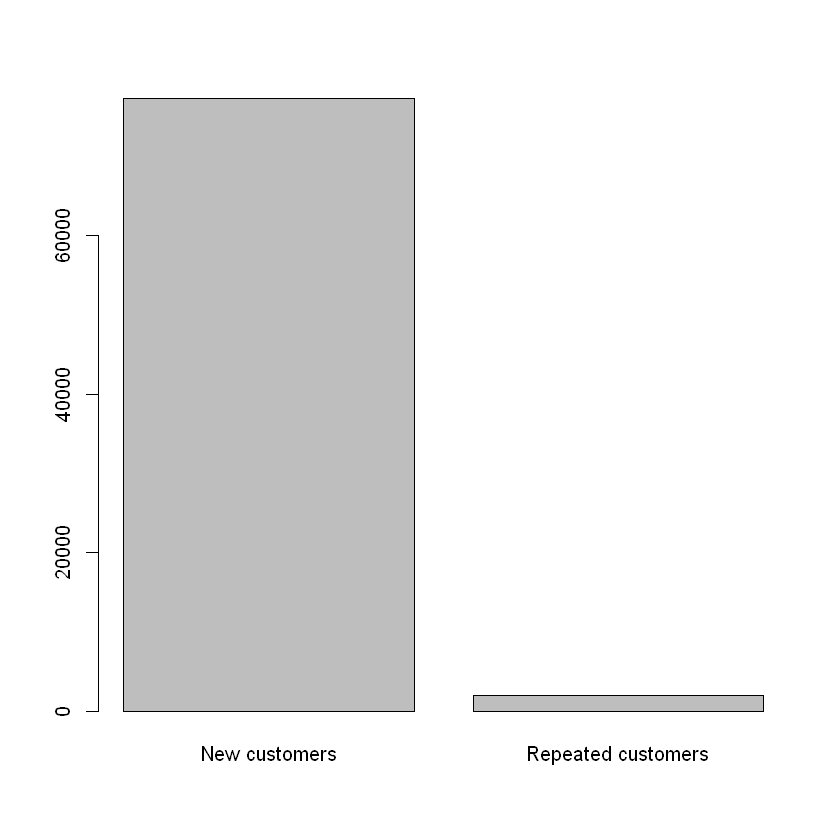

In [16]:
CG0 <- table(cityHotels0['is_repeated_guest'])
CG1 <-table(cityHotels1['is_repeated_guest'])
YCG <- c(CG0, CG1)
XCG <- c("New customers", "Repeated customers")
barplot(YCG,width = 2 ,names.arg = XCG)

In [17]:
##Mapping new and repeat customers for Resort Hotels

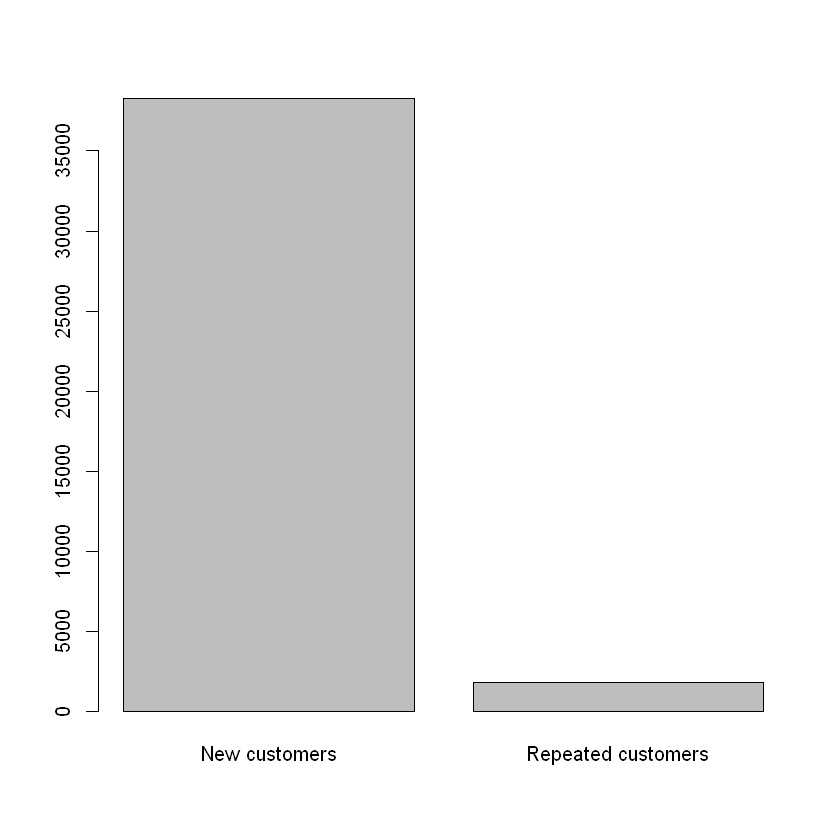

In [18]:
RG0 <- table(resortHotels0['is_repeated_guest'])
RG1 <-table(resortHotels1['is_repeated_guest'])
YRG <- c(RG0, RG1)
XRG <- c("New customers", "Repeated customers")
barplot(YRG,width = 2 ,names.arg = XRG)

In [19]:
cityHotels

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
City Hotel,1,79,2015,July,27,2,0,3,2,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-06-25
City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
City Hotel,1,63,2015,July,27,2,1,3,1,...,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,2015-06-25
City Hotel,1,62,2015,July,27,2,2,3,2,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
City Hotel,1,62,2015,July,27,2,2,3,2,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02


In [20]:
##Trying to plot how many adults visited in a certain week over the years

In [21]:
weeknry2015 <- select(cityHotels$arrival_date_week_number, cityHotels$arrival_date_year == "2015")

ERROR: Error in UseMethod("select_"): no applicable method for 'select_' applied to an object of class "c('integer', 'numeric')"


In [40]:
aggregate(cityHotels$is_canceled, , sum)

ERROR: Error in match.fun(FUN): object 'FUN' not found


In [35]:
barplot(cityHotels2015, arrival_date_month)

ERROR: Error in barplot.default(cityHotels2015, arrival_date_month, is_canceled): object 'is_canceled' not found


In [ ]:
cityHotels %>%
ggplot(aes( children, adults , group = 1)) + 
    geom_bar(aes())
 

In [44]:
str(cityHotels2015)

'data.frame':	13678 obs. of  32 variables:
 $ hotel                         : Factor w/ 2 levels "City Hotel","Resort Hotel": 1 1 1 1 1 1 1 1 1 1 ...
 $ is_canceled                   : int  0 1 1 1 1 1 0 1 1 1 ...
 $ lead_time                     : int  6 88 65 92 100 79 3 63 62 62 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : Factor w/ 12 levels "April","August",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 2 2 2 2 2 2 ...
 $ stays_in_weekend_nights       : int  0 0 0 2 0 0 0 1 2 2 ...
 $ stays_in_week_nights          : int  2 4 4 4 2 3 3 3 3 3 ...
 $ adults                        : int  1 2 1 2 2 2 1 1 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : Factor w/ 5 levels "BB","F

In [75]:
sum2015 <- with(cityHotels2015, sum[is_canceled == "1";(arrival_date_month == "July" )])

ERROR: Error in parse(text = x, srcfile = src): <text>:1:55: unexpected ';'
1: sum2015 <- with(cityHotels2015, sum[is_canceled == "1";
                                                          ^


In [69]:
sum2015

[1] 6000

In [67]:
barplot(cityHotels2015, sum2015 , arrival_date_month)

ERROR: Error in barplot.default(cityHotels2015, sum2015, arrival_date_month): object 'arrival_date_month' not found
